# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5 # 5 increase n 
label_name = "stat1"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4021462202072144
Epoch 1, Loss 1.4116395115852356
Epoch 2, Loss 1.3947709798812866
Epoch 3, Loss 1.4222206473350525
Epoch 4, Loss 1.388547658920288
Epoch 5, Loss 1.4037059545516968
Epoch 6, Loss 1.3628684282302856
Epoch 7, Loss 1.424588918685913
Epoch 8, Loss 1.347913146018982
Epoch 9, Loss 1.4167782664299011
Epoch 10, Loss 1.3441241383552551
Epoch 11, Loss 1.340719759464264
Epoch 12, Loss 1.332494854927063
Epoch 13, Loss 1.377509891986847
Epoch 14, Loss 1.326075255870819
Epoch 15, Loss 1.3786190748214722
Epoch 16, Loss 1.3110960125923157
Epoch 17, Loss 1.3154592514038086
Epoch 18, Loss 1.321557879447937
Epoch 19, Loss 1.2915126085281372
Epoch 20, Loss 1.2826866507530212
Epoch 21, Loss 1.2869863510131836
Epoch 22, Loss 1.3050811290740967
Epoch 23, Loss 1.2836873531341553
Epoch 24, Loss 1.2812200784683228
Epoch 25, Loss 1.298352837562561
Epoch 26, Loss 1.2540541291236877
Epoch 27, Loss 1.242586374282837
Epoch 28, Loss 1.2484430074691772
Epoch 29, Loss 1.2372912764549255


# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

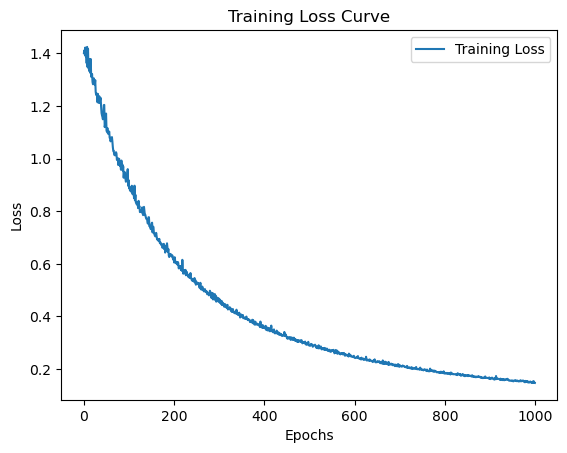

In [5]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[74, 0], [0, 22]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


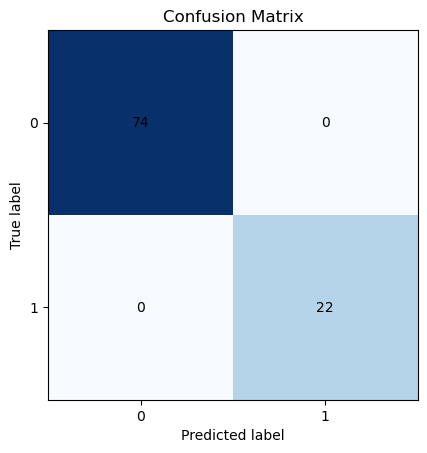

In [6]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

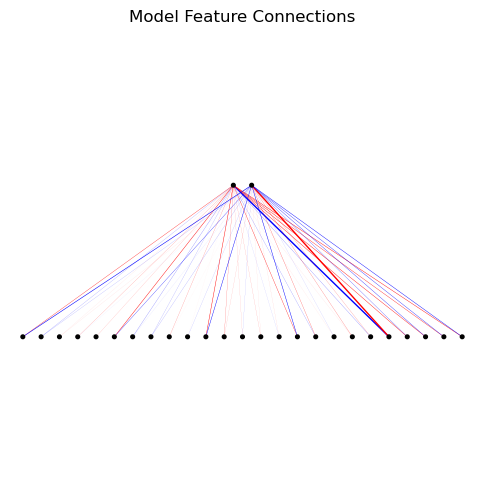

In [7]:
model.plot_connections()

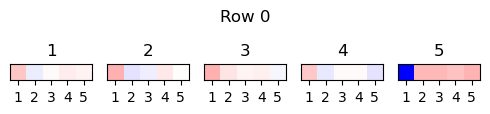

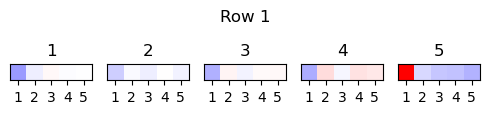

In [8]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [9]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)